In [66]:
import pandas as pd
import glob
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import metapredict as meta
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
import pandas.io.common

## 1. Reading in the MTR scores for CDS, AD, DBD, RDs

All domains

In [67]:
domain_mtr = []

ENSTs = glob.glob("../soto_analysis/outputs/mutations/domains_mtr/*")

for ENST in ENSTs:
    try:
        df = pd.read_csv(ENST, sep = "\t", header = None)
        domain_mtr.append(df)
    except pandas.errors.EmptyDataError:
        print(ENST, " is empty and has been skipped.")

domain_mtr = pd.concat(domain_mtr)
domain_mtr

../soto_analysis/outputs/mutations/domains_mtr/ENST00000468660.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000379044.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000376983.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000315869.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000376670.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000374259.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000528386.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000373294.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000373514.bed  is empty and has been skipped.
../soto_analysis/outputs/mutations/domains_mtr/ENST00000308167.bed  is empty and has been skipped.
../soto_an

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6,53130871,53130872,DBD,NaN,.,-,ENST00000259803,6,53130871,53130872,ENST00000259803,-1,6,53130871,53130872,0.654677
1,6,53130872,53130873,DBD,NaN,.,-,ENST00000259803,6,53130872,53130873,ENST00000259803,-1,6,53130872,53130873,0.654677
2,6,53130873,53130874,DBD,NaN,.,-,ENST00000259803,6,53130873,53130874,ENST00000259803,-1,6,53130873,53130874,0.654677
3,6,53130874,53130875,DBD,NaN,.,-,ENST00000259803,6,53130874,53130875,ENST00000259803,-1,6,53130874,53130875,0.719452
4,6,53130875,53130876,DBD,NaN,.,-,ENST00000259803,6,53130875,53130876,ENST00000259803,-1,6,53130875,53130876,0.719452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,19,15379723,15379724,AD,NaN,.,-,ENST00000269701,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138
1902,19,15379724,15379725,AD,NaN,.,-,ENST00000269701,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138
1903,19,15379725,15379726,AD,NaN,.,-,ENST00000269701,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221
1904,19,15379726,15379727,AD,NaN,.,-,ENST00000269701,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221


In [68]:
domain_mtr = domain_mtr.rename(columns = {7: "ENST", 16: "MTR"})
dbd_mtr = domain_mtr[domain_mtr[3] == "DBD"]
ad_mtr = domain_mtr[domain_mtr[3] == "AD"]
rd_mtr = domain_mtr[domain_mtr[3] == "RD"]

Broken down into domain type

In [69]:
ad_mtr

,0,1,2,3,4,5,6,ENST,8,9,10,11,12,13,14,15,MTR
356,6,53128616,53128617,AD,NaN,.,-,ENST00000259803,6,53128616,53128617,ENST00000259803,-1,6,53128616,53128617,1.049816
357,6,53128617,53128618,AD,NaN,.,-,ENST00000259803,6,53128617,53128618,ENST00000259803,-1,6,53128617,53128618,1.049816
358,6,53128618,53128619,AD,NaN,.,-,ENST00000259803,6,53128618,53128619,ENST00000259803,-1,6,53128618,53128619,1.049816
359,6,53128619,53128620,AD,NaN,.,-,ENST00000259803,6,53128619,53128620,ENST00000259803,-1,6,53128619,53128620,1.046971
360,6,53128620,53128621,AD,NaN,.,-,ENST00000259803,6,53128620,53128621,ENST00000259803,-1,6,53128620,53128621,1.046971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,19,15379723,15379724,AD,NaN,.,-,ENST00000269701,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138
1902,19,15379724,15379725,AD,NaN,.,-,ENST00000269701,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138
1903,19,15379725,15379726,AD,NaN,.,-,ENST00000269701,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221
1904,19,15379726,15379727,AD,NaN,.,-,ENST00000269701,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221


In [70]:
dbd_mtr

,0,1,2,3,4,5,6,ENST,8,9,10,11,12,13,14,15,MTR
0,6,53130871,53130872,DBD,NaN,.,-,ENST00000259803,6,53130871,53130872,ENST00000259803,-1,6,53130871,53130872,0.654677
1,6,53130872,53130873,DBD,NaN,.,-,ENST00000259803,6,53130872,53130873,ENST00000259803,-1,6,53130872,53130873,0.654677
2,6,53130873,53130874,DBD,NaN,.,-,ENST00000259803,6,53130873,53130874,ENST00000259803,-1,6,53130873,53130874,0.654677
3,6,53130874,53130875,DBD,NaN,.,-,ENST00000259803,6,53130874,53130875,ENST00000259803,-1,6,53130874,53130875,0.719452
4,6,53130875,53130876,DBD,NaN,.,-,ENST00000259803,6,53130875,53130876,ENST00000259803,-1,6,53130875,53130876,0.719452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,19,15379723,15379724,DBD,NaN,.,-,ENST00000269701,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138
1718,19,15379724,15379725,DBD,NaN,.,-,ENST00000269701,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138
1719,19,15379725,15379726,DBD,NaN,.,-,ENST00000269701,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221
1720,19,15379726,15379727,DBD,NaN,.,-,ENST00000269701,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221


In [71]:
rd_mtr

,0,1,2,3,4,5,6,ENST,8,9,10,11,12,13,14,15,MTR
898,6,53128944,53128945,RD,NaN,.,-,ENST00000259803,6,53128944,53128945,ENST00000259803,-1,6,53128944,53128945,0.956000
899,6,53128945,53128946,RD,NaN,.,-,ENST00000259803,6,53128945,53128946,ENST00000259803,-1,6,53128945,53128946,0.956000
900,6,53130802,53130803,RD,NaN,.,-,ENST00000259803,6,53130802,53130803,ENST00000259803,-1,6,53130802,53130803,0.964607
901,6,53130803,53130804,RD,NaN,.,-,ENST00000259803,6,53130803,53130804,ENST00000259803,-1,6,53130803,53130804,0.964607
902,6,53130804,53130805,RD,NaN,.,-,ENST00000259803,6,53130804,53130805,ENST00000259803,-1,6,53130804,53130805,0.964607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,14,64260552,64260553,RD,NaN,.,-,ENST00000341099,14,64260552,64260553,ENST00000341099,-1,14,64260552,64260553,0.897012
1446,14,64260553,64260554,RD,NaN,.,-,ENST00000341099,14,64260553,64260554,ENST00000341099,-1,14,64260553,64260554,0.897012
1447,14,64260554,64260555,RD,NaN,.,-,ENST00000341099,14,64260554,64260555,ENST00000341099,-1,14,64260554,64260555,0.936976
1448,14,64260555,64260556,RD,NaN,.,-,ENST00000341099,14,64260555,64260556,ENST00000341099,-1,14,64260555,64260556,0.936976


Full cds

In [72]:
cds_mtr = []

cds_paths = glob.glob("../soto_analysis/outputs/mutations/cds_mtr/*")

for path in cds_paths:
    ENST = path.split("/")[-1].split(".bed")[0]
    if ENST in set(ad_mtr["ENST"]):
        try:
            df = pd.read_csv(path, sep = "\t", header = None)
            cds_mtr.append(df)
        except pandas.errors.EmptyDataError:
            print(ENST, " is empty and has been skipped.")

cds_mtr = pd.concat(cds_mtr)
cds_mtr = cds_mtr.rename(columns = {3: "ENST", 8: "MTR"})
cds_mtr

,0,1,2,ENST,4,5,6,7,MTR
0,6,53128208,53128209,ENST00000259803,-1,6,53128208,53128209,0.987538
1,6,53128209,53128210,ENST00000259803,-1,6,53128209,53128210,0.987538
2,6,53128210,53128211,ENST00000259803,-1,6,53128210,53128211,0.987538
3,6,53128211,53128212,ENST00000259803,-1,6,53128211,53128212,1.000560
4,6,53128212,53128213,ENST00000259803,-1,6,53128212,53128213,1.000560
...,...,...,...,...,...,...,...,...,...
1717,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138
1718,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138
1719,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221
1720,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221


In [73]:
len(set(cds_mtr["ENST"]))

409

## 2. Visualizing differences between groups

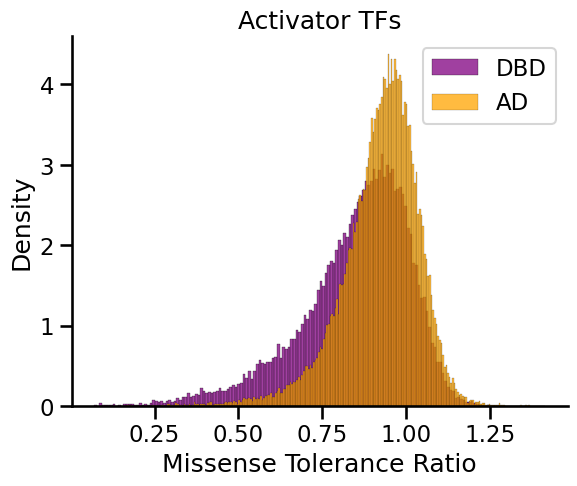

In [74]:
#bins = np.arange(-10, 10.1, 0.5)
#sns.histplot(cds_mtr["MTR"], label = "cds", stat = "density")
plt.title("Activator TFs")
sns.histplot(dbd_mtr["MTR"], label = "DBD", stat = "density", color = "purple")
sns.histplot(ad_mtr["MTR"], label = "AD", stat = "density", color = "orange")
sns.despine()
plt.xlabel("Missense Tolerance Ratio")
plt.legend();

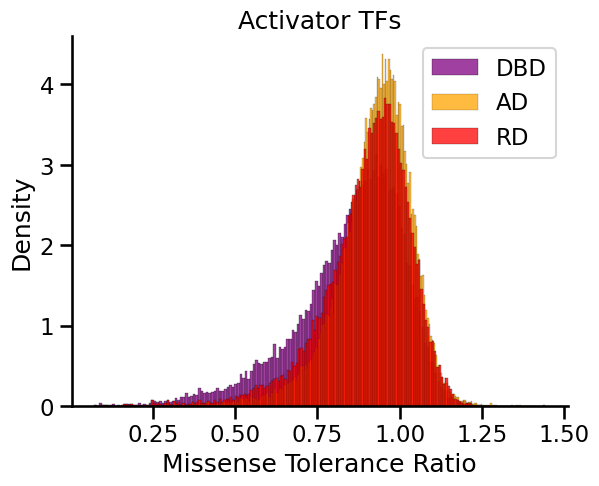

In [75]:
#bins = np.arange(-10, 10.1, 0.5)
#sns.histplot(cds_mtr["MTR"], label = "cds", stat = "density")
plt.title("Activator TFs")
sns.histplot(dbd_mtr["MTR"], label = "DBD", stat = "density", color = "purple")
sns.histplot(ad_mtr["MTR"], label = "AD", stat = "density", color = "orange")
sns.histplot(rd_mtr["MTR"], label = "RD", stat = "density", color = "red")

sns.despine()
plt.xlabel("Missense Tolerance Ratio")
plt.legend();

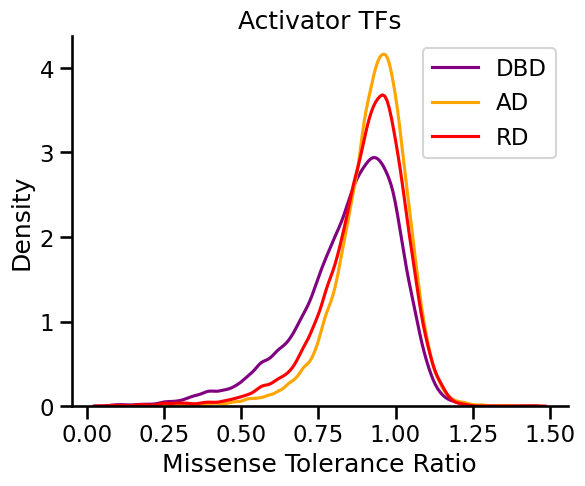

In [76]:
#bins = np.arange(-10, 10.1, 0.5)
#sns.histplot(cds_mtr["MTR"], label = "cds", stat = "density")
plt.title("Activator TFs")
sns.kdeplot(dbd_mtr["MTR"], label = "DBD", color = "purple")
sns.kdeplot(ad_mtr["MTR"], label = "AD", color = "orange")
sns.kdeplot(rd_mtr["MTR"], label = "RD", color = "red")

sns.despine()
plt.xlabel("Missense Tolerance Ratio")
plt.legend();

In [80]:
cds_mtr_to_merge = cds_mtr[[0, 1, 2,"ENST", 4, "MTR"]].copy(deep = True)
cds_mtr_to_merge = cds_mtr_to_merge.rename(columns = {4: 12})
cds_mtr_to_merge

,0,1,2,ENST,12,MTR
0,6,53128208,53128209,ENST00000259803,-1,0.987538
1,6,53128209,53128210,ENST00000259803,-1,0.987538
2,6,53128210,53128211,ENST00000259803,-1,0.987538
3,6,53128211,53128212,ENST00000259803,-1,1.000560
4,6,53128212,53128213,ENST00000259803,-1,1.000560
...,...,...,...,...,...,...
1717,19,15379723,15379724,ENST00000269701,-1,0.946138
1718,19,15379724,15379725,ENST00000269701,-1,0.946138
1719,19,15379725,15379726,ENST00000269701,-1,0.963221
1720,19,15379726,15379727,ENST00000269701,-1,0.963221


In [81]:
ad_mtr_to_merge = ad_mtr[[0, 1, 2, "ENST", 12, "MTR"]]
ad_mtr_to_merge

,0,1,2,ENST,12,MTR
356,6,53128616,53128617,ENST00000259803,-1,1.049816
357,6,53128617,53128618,ENST00000259803,-1,1.049816
358,6,53128618,53128619,ENST00000259803,-1,1.049816
359,6,53128619,53128620,ENST00000259803,-1,1.046971
360,6,53128620,53128621,ENST00000259803,-1,1.046971
...,...,...,...,...,...,...
1901,19,15379723,15379724,ENST00000269701,-1,0.946138
1902,19,15379724,15379725,ENST00000269701,-1,0.946138
1903,19,15379725,15379726,ENST00000269701,-1,0.963221
1904,19,15379726,15379727,ENST00000269701,-1,0.963221


In [82]:
rd_mtr_to_merge = rd_mtr[[0, 1, 2, "ENST", 12, "MTR"]]
rd_mtr_to_merge

,0,1,2,ENST,12,MTR
898,6,53128944,53128945,ENST00000259803,-1,0.956000
899,6,53128945,53128946,ENST00000259803,-1,0.956000
900,6,53130802,53130803,ENST00000259803,-1,0.964607
901,6,53130803,53130804,ENST00000259803,-1,0.964607
902,6,53130804,53130805,ENST00000259803,-1,0.964607
...,...,...,...,...,...,...
1445,14,64260552,64260553,ENST00000341099,-1,0.897012
1446,14,64260553,64260554,ENST00000341099,-1,0.897012
1447,14,64260554,64260555,ENST00000341099,-1,0.936976
1448,14,64260555,64260556,ENST00000341099,-1,0.936976


In [83]:
dbd_mtr_to_merge = dbd_mtr[[0, 1, 2, "ENST", 12, "MTR"]]
dbd_mtr_to_merge

,0,1,2,ENST,12,MTR
0,6,53130871,53130872,ENST00000259803,-1,0.654677
1,6,53130872,53130873,ENST00000259803,-1,0.654677
2,6,53130873,53130874,ENST00000259803,-1,0.654677
3,6,53130874,53130875,ENST00000259803,-1,0.719452
4,6,53130875,53130876,ENST00000259803,-1,0.719452
...,...,...,...,...,...,...
1717,19,15379723,15379724,ENST00000269701,-1,0.946138
1718,19,15379724,15379725,ENST00000269701,-1,0.946138
1719,19,15379725,15379726,ENST00000269701,-1,0.963221
1720,19,15379726,15379727,ENST00000269701,-1,0.963221


In [84]:
cds_mtr_to_merge = pd.merge(cds_mtr_to_merge, ad_mtr_to_merge, how = "left", indicator = "AD")
cds_mtr_to_merge = pd.merge(cds_mtr_to_merge, rd_mtr_to_merge, how = "left", indicator = "RD")
cds_mtr_to_merge = pd.merge(cds_mtr_to_merge, dbd_mtr_to_merge, how = "left", indicator = "DBD")
cds_mtr_to_merge

,0,1,2,ENST,12,MTR,AD,RD,DBD
0,6,53128208,53128209,ENST00000259803,-1,0.987538,both,left_only,left_only
1,6,53128209,53128210,ENST00000259803,-1,0.987538,both,left_only,left_only
2,6,53128210,53128211,ENST00000259803,-1,0.987538,both,left_only,left_only
3,6,53128211,53128212,ENST00000259803,-1,1.000560,both,left_only,left_only
4,6,53128212,53128213,ENST00000259803,-1,1.000560,both,left_only,left_only
...,...,...,...,...,...,...,...,...,...
580006,19,15379723,15379724,ENST00000269701,-1,0.946138,both,left_only,both
580007,19,15379724,15379725,ENST00000269701,-1,0.946138,both,left_only,both
580008,19,15379725,15379726,ENST00000269701,-1,0.963221,both,left_only,both
580009,19,15379726,15379727,ENST00000269701,-1,0.963221,both,left_only,both


In [85]:
bool_dict = {"left_only" : False, "both" : True}

cds_mtr_to_merge["AD"] = cds_mtr_to_merge["AD"].map(bool_dict)
cds_mtr_to_merge["RD"] = cds_mtr_to_merge["RD"].map(bool_dict)
cds_mtr_to_merge["DBD"] = cds_mtr_to_merge["DBD"].map(bool_dict)
cds_mtr_to_merge

,0,1,2,ENST,12,MTR,AD,RD,DBD
0,6,53128208,53128209,ENST00000259803,-1,0.987538,True,False,False
1,6,53128209,53128210,ENST00000259803,-1,0.987538,True,False,False
2,6,53128210,53128211,ENST00000259803,-1,0.987538,True,False,False
3,6,53128211,53128212,ENST00000259803,-1,1.000560,True,False,False
4,6,53128212,53128213,ENST00000259803,-1,1.000560,True,False,False
...,...,...,...,...,...,...,...,...,...
580006,19,15379723,15379724,ENST00000269701,-1,0.946138,True,False,True
580007,19,15379724,15379725,ENST00000269701,-1,0.946138,True,False,True
580008,19,15379725,15379726,ENST00000269701,-1,0.963221,True,False,True
580009,19,15379726,15379727,ENST00000269701,-1,0.963221,True,False,True


In [86]:
cds_mtr_to_merge_no_dom = cds_mtr_to_merge[(cds_mtr_to_merge["AD"] == False) & (cds_mtr_to_merge["DBD"] == False) & (cds_mtr_to_merge["RD"] == False) ]
cds_mtr_to_merge_no_dom

,0,1,2,ENST,12,MTR,AD,RD,DBD
342,6,53128614,53128615,ENST00000259803,-1,1.031076,False,False,False
343,6,53128615,53128616,ENST00000259803,-1,1.031076,False,False,False
544,6,53128859,53128860,ENST00000259803,-1,1.040247,False,False,False
545,6,53128860,53128861,ENST00000259803,-1,1.040247,False,False,False
546,6,53128861,53128862,ENST00000259803,-1,1.040247,False,False,False
...,...,...,...,...,...,...,...,...,...
577745,14,64260747,64260748,ENST00000341099,-1,0.862418,False,False,False
577746,14,64268794,64268795,ENST00000341099,-1,0.862418,False,False,False
577747,14,64268795,64268796,ENST00000341099,-1,0.855046,False,False,False
577748,14,64268796,64268797,ENST00000341099,-1,0.855046,False,False,False


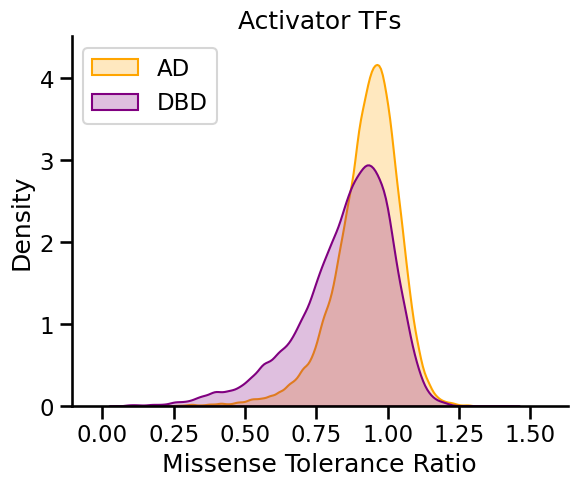

In [114]:
sns.kdeplot(data = ad_mtr, x = "MTR", color = "orange", label = "AD", fill = True)
sns.kdeplot(data = dbd_mtr, x = "MTR", color = "purple", label = "DBD", fill = True)
sns.kdeplot(data = rd_mtr, x = "MTR", color = "none", label = "", fill = True)
sns.kdeplot(data = cds_mtr_to_merge_no_dom, x = "MTR", color = "none", label = "", fill = True)

plt.title("Activator TFs")
plt.xlabel("Missense Tolerance Ratio")
plt.legend(loc = "upper left")

sns.despine();

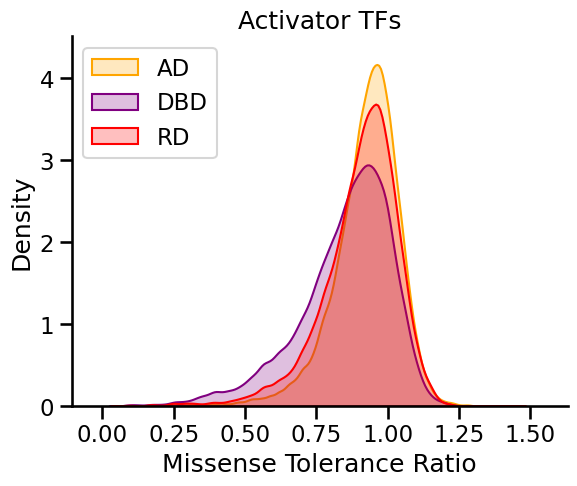

In [115]:
sns.kdeplot(data = ad_mtr, x = "MTR", color = "orange", label = "AD", fill = True)
sns.kdeplot(data = dbd_mtr, x = "MTR", color = "purple", label = "DBD", fill = True)
sns.kdeplot(data = rd_mtr, x = "MTR", color = "red", label = "RD", fill = True)
sns.kdeplot(data = cds_mtr_to_merge_no_dom, x = "MTR", color = "none", label = "", fill = True)

plt.title("Activator TFs")
plt.xlabel("Missense Tolerance Ratio")
plt.legend(loc = "upper left")

sns.despine();

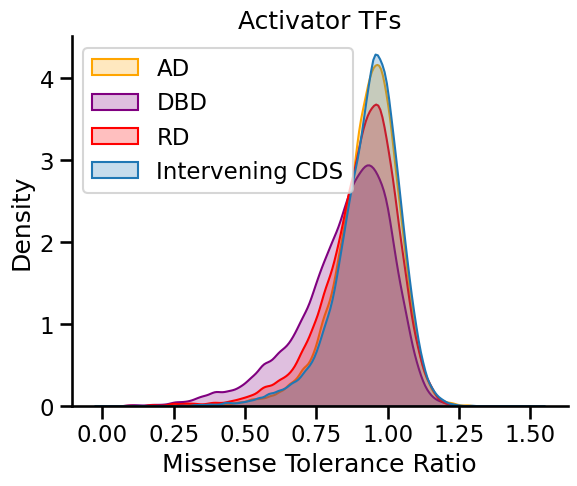

In [116]:
sns.kdeplot(data = ad_mtr, x = "MTR", color = "orange", label = "AD", fill = True)
sns.kdeplot(data = dbd_mtr, x = "MTR", color = "purple", label = "DBD", fill = True)
sns.kdeplot(data = rd_mtr, x = "MTR", color = "red", label = "RD", fill = True)
sns.kdeplot(data = cds_mtr_to_merge_no_dom, x = "MTR", label = "Intervening CDS", fill = True)

plt.title("Activator TFs")
plt.xlabel("Missense Tolerance Ratio")
plt.legend(loc = "upper left")

sns.despine();

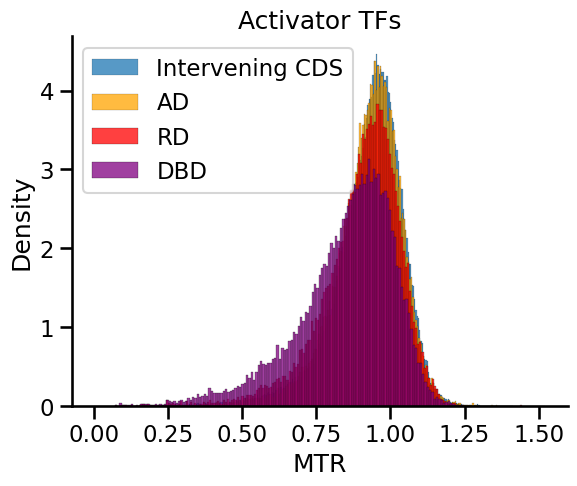

In [92]:
sns.histplot(data = cds_mtr_to_merge_no_dom, x = "MTR", label = "Intervening CDS", stat = "density")
sns.histplot(data = ad_mtr, x = "MTR", color = "orange", label = "AD", stat = "density")
sns.histplot(data = rd_mtr, x = "MTR", color = "red", label = "RD", stat = "density")
sns.histplot(data = dbd_mtr, x = "MTR", color = "purple", label = "DBD", stat = "density")

plt.title("Activator TFs")
plt.legend()
sns.despine();

## 3. Plotting Traces

In [59]:
lambert_TFs_ENST = pd.read_csv("../output/TFs_with_ENST.csv")
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
ENST_to_gene_df = pd.merge(known_ADs, lambert_TFs_ENST, on = "uniprotID")[["ENST", "Gene"]].drop_duplicates()
ENST_to_gene_df["ENST"] = ENST_to_gene_df["ENST"].str.split('.').str[0]
ENST_to_gene = dict(zip(ENST_to_gene_df["ENST"], ENST_to_gene_df["Gene"]))

In [118]:
lambert_TFs = pd.read_csv("../output/lambert_TFs_10-21-24_with_DBD_coords.csv")
lambert_TFs["uniprotID"] = lambert_TFs["id"].str.split("|").str[1]
lambert_TFs = pd.merge(lambert_TFs, lambert_TFs_ENST, on = "uniprotID")
lambert_TFs["ENST"] = lambert_TFs["ENST"].str.split('.').str[0]
lambert_TFs.head(3)

,Unnamed: 0_x,id,ProteinSeq,DBD_coords_merged,uniprotID,Unnamed: 0_y,ENST,canonical_uniprot_id_isoform
0,0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[[221, 243], [249, 271], [277, 299], [305, 327...",A0A087WUV0,0,ENST00000425953,A0A087WUV0
1,1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,"[[114, 182], [262, 347]]",A0AVK6,1,ENST00000250024,A0AVK6
2,2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[[260, 282], [288, 310], [316, 338], [344, 366...",A0PJY2,747,ENST00000442488,A0PJY2-1


In [119]:
sns.set_context('paper')

tfs_tbl = pd.read_csv("../soto_analysis/outputs/all_TFs_table_proteins.txt", sep = "\t")


#https://www.geeksforgeeks.org/python-make-a-list-of-intervals-with-sequential-numbers/
def intervals_extract(iterable):
     
    iterable = sorted(set(iterable))
    for key, group in itertools.groupby(enumerate(iterable),
    lambda t: t[1] - t[0]):
        group = list(group)
        yield [group[0][1], group[-1][1]]

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)


ENST00000287820


,pos
960,12351593
961,12351594
962,12351595
963,12351596
964,12351597
...,...
1513,12434141
1514,12434142
1515,12434143
1516,12434144


,pos,0,1,2,ENST,4,5,6,7,MTR,cds_nt
0,12351593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,12351594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,12351595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,12351596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,12351597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
1514,12434141,3.0,12434140.0,12434141.0,ENST00000287820,1.0,3.0,12434140.0,12434141.0,0.372229,1513
1515,12434142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1514
1516,12434143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1515
1517,12434144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516


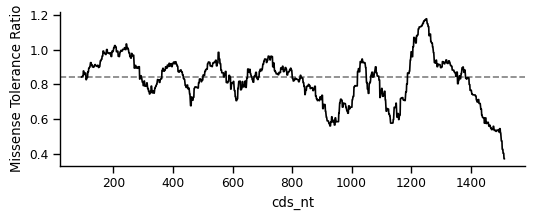

In [164]:
for ENST in ["ENST00000287820"]:
    print()
    print(ENST)

    if ENST_mtr[4].iloc[0] == -1:
        ascending = False
    else: 
        ascending = True

    ENST_mtr = cds_mtr[cds_mtr["ENST"] == ENST]
    ENST_mtr = ENST_mtr.sort_values(by = 1, ascending = ascending)

    cds_bed = pd.read_csv("../soto_analysis/outputs/mutations/cds_bed_format/" + ENST, sep = "\t", header = None)
    cds_bed["pos"] = [np.arange(s + 1, e + 1) for s, e in zip(cds_bed[1], cds_bed[2])]

    full_cds_positions = cds_bed[["pos"]].explode("pos").reset_index(drop = True)
    full_cds_positions = full_cds_positions.sort_values(by = "pos", ascending = ascending)
    display(full_cds_positions)

    merged = pd.merge(full_cds_positions, ENST_mtr, how = "left", left_on = "pos", right_on = 2)
    merged = merged.drop_duplicates(subset = "pos")
    merged["cds_nt"] = np.arange(len(merged))
    display(merged)
    
    plt.figure(figsize=(6, 2))
    plt.axhline(0.841, color = "gray", linestyle = "--")
    #sns.scatterplot(data=merged, x="cds_nt", y='MTR', color='black', legend = False)
    sns.lineplot(data=merged, x="cds_nt", y='MTR', color='black', legend = False)
    sns.despine()
    plt.ylabel("Missense Tolerance Ratio")
    
    # uniprotID = lambert_TFs[lambert_TFs["ENST"] == ENST]["uniprotID"].iloc[0]
    # domains = pd.read_csv("../soto_analysis/outputs/mutations/domains_mtr/" + ENST + ".bed", sep = "\t", header = None)
    # domains = domains[[0, 1, 2, 3]]



In [166]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# SFARI TF comparison

## 

In [168]:
cds_mtr

,0,1,2,ENST,4,5,6,7,MTR
0,6,53128208,53128209,ENST00000259803,-1,6,53128208,53128209,0.987538
1,6,53128209,53128210,ENST00000259803,-1,6,53128209,53128210,0.987538
2,6,53128210,53128211,ENST00000259803,-1,6,53128210,53128211,0.987538
3,6,53128211,53128212,ENST00000259803,-1,6,53128211,53128212,1.000560
4,6,53128212,53128213,ENST00000259803,-1,6,53128212,53128213,1.000560
...,...,...,...,...,...,...,...,...,...
1717,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138
1718,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138
1719,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221
1720,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221


In [169]:
# Loading in info about the ADs
cc_names = pd.read_excel("../data/gene_names_with_location_and_pmvs.xlsx")
cc_names = cc_names.rename(columns = {"gene" : "Gene", "start" : "Start", "end" : "End"})
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
cc_names = pd.merge(known_ADs[["uniprotID", "Gene", "Start", "End"]], cc_names)
ensts = pd.read_csv("../data/SFARI_TFs_with_ENST_corrected.csv", index_col = 0)
cc_names = pd.merge(cc_names, ensts)
cc_names["ENST"] = cc_names["ENST"].str.split(".").str[0]
cc_names["len"] = cc_names["End"] - cc_names["Start"] + 1
cc_names = cc_names.rename(columns = {"Start" : "start", "End" : "end"})
cc_names.at[9, "end"] = 93 # to make consistent with other table
cc_names

,uniprotID,Gene,start,end,pMVS #,Gene Name,ENST,len
0,O94983,CAMTA2,285,468,404,CAMTA2_AD1,ENST00000348066,184
1,O94983,CAMTA2,472,581,405,CAMTA2_AD2,ENST00000348066,110
2,P11308,ERG,433,479,400,ERG_AD1,ENST00000288319,47
3,P11308,ERG,118,261,406,ERG_AD2,ENST00000288319,144
4,Q13422,IKZF1,284,365,402,IKZF1_AD,ENST00000331340,82
5,O14770,MEIS2,340,477,377,MEIS2_AD,ENST00000561208,138
6,Q15788,NCOA1,1241,1385,379,NCOA1_AD2,ENST00000348332,145
7,Q15788,NCOA1,840,1011,380,NCOA1_AD3,ENST00000348332,172
8,O95096,NKX2-2,220,273,381,NKX2-2_AD,ENST00000377142,54
9,P43354,NR4A2,1,93,382,NR4A2_AD1,ENST00000339562,91


In [171]:
cds_mtr["SFARI"] = cds_mtr["ENST"].isin(cc_names["ENST"])
cds_mtr

,0,1,2,ENST,4,5,6,7,MTR,SFARI
0,6,53128208,53128209,ENST00000259803,-1,6,53128208,53128209,0.987538,False
1,6,53128209,53128210,ENST00000259803,-1,6,53128209,53128210,0.987538,False
2,6,53128210,53128211,ENST00000259803,-1,6,53128210,53128211,0.987538,False
3,6,53128211,53128212,ENST00000259803,-1,6,53128211,53128212,1.000560,False
4,6,53128212,53128213,ENST00000259803,-1,6,53128212,53128213,1.000560,False
...,...,...,...,...,...,...,...,...,...,...
1717,19,15379723,15379724,ENST00000269701,-1,19,15379723,15379724,0.946138,False
1718,19,15379724,15379725,ENST00000269701,-1,19,15379724,15379725,0.946138,False
1719,19,15379725,15379726,ENST00000269701,-1,19,15379725,15379726,0.963221,False
1720,19,15379726,15379727,ENST00000269701,-1,19,15379726,15379727,0.963221,False


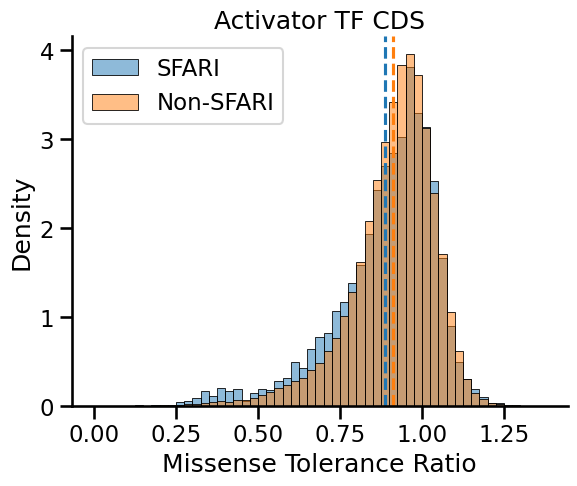

In [199]:
sns.set_context('talk')
sns.histplot(data = cds_mtr[cds_mtr["SFARI"]], x ="MTR", label = "SFARI", stat = "density", bins = np.arange(0, 1.4, 0.025), alpha = 0.5)
plt.axvline(np.mean(cds_mtr[cds_mtr["SFARI"]]["MTR"]), linestyle = "--")
    
sns.histplot(data = cds_mtr[~cds_mtr["SFARI"]], x ="MTR", label = "Non-SFARI", stat = "density", bins = np.arange(0, 1.4, 0.025), alpha = 0.5)
plt.axvline(np.mean(cds_mtr[~cds_mtr["SFARI"]]["MTR"]), color = sns.color_palette('tab10')[1], linestyle = "--")


plt.legend()
plt.title("Activator TF CDS")
plt.xlabel("Missense Tolerance Ratio")
sns.despine()

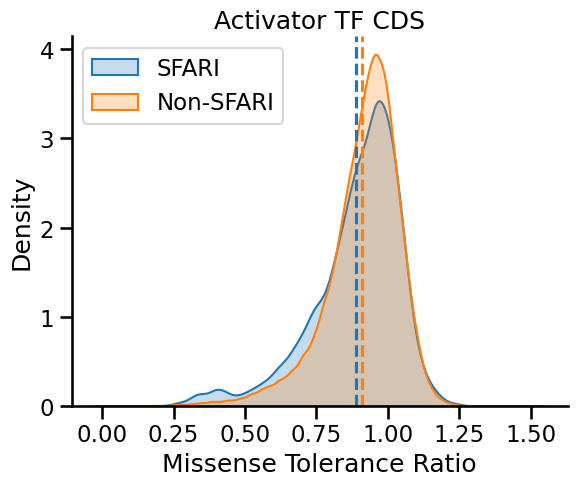

In [198]:
sns.set_context('talk')
sns.kdeplot(data = cds_mtr[cds_mtr["SFARI"]], x ="MTR", label = "SFARI", fill = True)
plt.axvline(np.mean(cds_mtr[cds_mtr["SFARI"]]["MTR"]), linestyle = "--")
    
sns.kdeplot(data = cds_mtr[~cds_mtr["SFARI"]], x ="MTR", label = "Non-SFARI", fill = True)
plt.axvline(np.mean(cds_mtr[~cds_mtr["SFARI"]]["MTR"]), color = sns.color_palette('tab10')[1], linestyle = "--")


plt.legend()
plt.title("Activator TF CDS")
plt.xlabel("Missense Tolerance Ratio")
sns.despine()